# DataCamp Certification Case Study

### Project Brief

You have been hired as a data scientist at a used car dealership in the UK. The sales team have been having problems with pricing used cars that arrive at the dealership and would like your help. Before they take any company wide action they would like you to work with the Toyota specialist to test your idea. They have already collected some data from other retailers on the price that a range of Toyota cars were listed at. It is known that cars that are more than £1500 above the estimated price will not sell. The sales team wants to know whether you can make predictions within this range.

The presentation of your findings should be targeted at the Head of Sales, who has no technical data science background.

The data you will use for this analysis can be accessed here: `"data/toyota.csv"`

In [1]:
'''Importing the extensions needed'''
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import Lasso
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import scale


'''Loading the data and checking it for null values'''
toyota = pd.read_csv("toyota.csv")
#print(toyota.head(), toyota.info(), toyota.shape, toyota.isnull().sum())


In [2]:
'''As model, transmission, and fuelType are non-numeric, make them into numeric values with get_dummies)'''
toyota = pd.get_dummies(toyota, columns=['model',"transmission","fuelType"])

print(toyota)

      year  price  mileage  tax   mpg  engineSize  model_ Auris  \
0     2016  16000    24089  265  36.2         2.0             0   
1     2017  15995    18615  145  36.2         2.0             0   
2     2015  13998    27469  265  36.2         2.0             0   
3     2017  18998    14736  150  36.2         2.0             0   
4     2017  17498    36284  145  36.2         2.0             0   
...    ...    ...      ...  ...   ...         ...           ...   
6733  2011   5500    30000   20  58.9         1.0             0   
6734  2011   4985    36154  125  50.4         1.3             0   
6735  2012   4995    46000  125  57.6         1.4             0   
6736  2011   3995    60700  125  50.4         1.3             0   
6737  2011   4495    45128  125  50.4         1.3             0   

      model_ Avensis  model_ Aygo  model_ C-HR  ...  model_ Verso-S  \
0                  0            0            0  ...               0   
1                  0            0            0  ...  

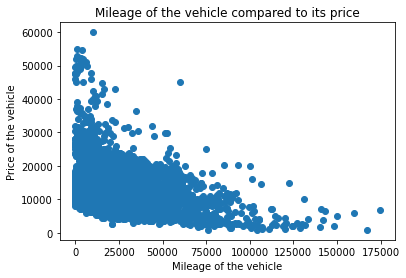

'Looking at this graph, we can see that as the mileage increases, the value of the vehicle decreases. This is a negative correlation.'

In [22]:
'''Spliting the data'''
X=toyota.drop("price", axis=1).values
y=toyota["price"].values

'''Prediction: mileage is the feature that is most closely related to price.'''
X_mileage = X[:,1]
y=y.reshape(-1,1)
X_mileage = X_mileage.reshape(-1,1)

plt.scatter(X_mileage,y)
plt.xlabel('Mileage of the vehicle')
plt.title('Mileage of the vehicle compared to its price')
plt.ylabel('Price of the vehicle')
plt.show()
'''Looking at this graph, we can see that as the mileage increases, the value of the vehicle decreases. This is a negative correlation.'''



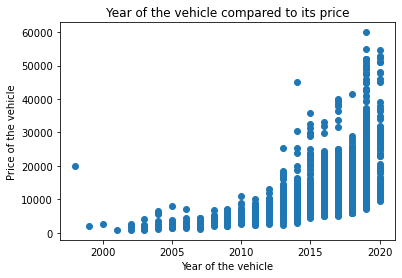

'Looking at this graph, we can see that as the year of the vehicle increases, the value of the vehicle increases. This is a positive correlation.'

In [23]:
'''Spliting the data'''
X=toyota.drop("price", axis=1).values
y=toyota["price"].values

'''Prediction: Year is a feature that is closely related to price.'''
X_year = X[:,0]
y=y.reshape(-1,1)
X_year = X_year.reshape(-1,1)

plt.scatter(X_year,y)
plt.xlabel('Year of the vehicle')
plt.ylabel('Price of the vehicle')
plt.title('Year of the vehicle compared to its price')
plt.show()

'''Looking at this graph, we can see that as the year of the vehicle increases, the value of the vehicle increases. This is a positive correlation.'''



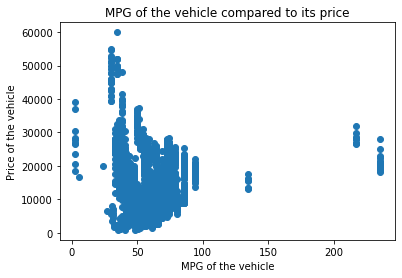

'Looking at this graph, we can see that as the MPG of the vehicle increases, the value of the vehicle does not nessessarily increase.We cannot use MPG as a correlation marker.'

In [24]:
'''Prediction: mpg is a feature that is closely related to price.'''
X_mpg = X[:,3]
y=y.reshape(-1,1)
X_mpg = X_mpg.reshape(-1,1)

plt.scatter(X_mpg,y)
plt.xlabel('MPG of the vehicle')
plt.ylabel('Price of the vehicle')
plt.title('MPG of the vehicle compared to its price')
plt.show()

'''Looking at this graph, we can see that as the MPG of the vehicle increases, the value of the vehicle does not nessessarily increase.\
We cannot use MPG as a correlation marker.'''



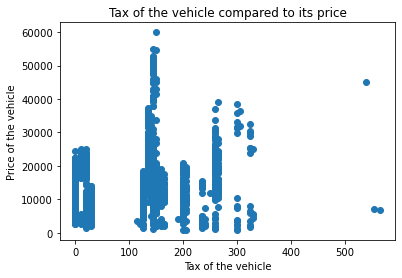

'Looking at this graph, we can see that as the tax of the vehicle increases, the value of the vehicle does not nessessarily increase.We cannot use tax as a correlation marker.'

In [25]:
'''Prediction:Tax is a feature that is closely related to price.'''
X_tax = X[:,2]
y=y.reshape(-1,1)
X_tax = X_tax.reshape(-1,1)

plt.scatter(X_tax,y)
plt.xlabel('Tax of the vehicle')
plt.ylabel('Price of the vehicle')
plt.title('Tax of the vehicle compared to its price')
plt.show()
'''Looking at this graph, we can see that as the tax of the vehicle increases, the value of the vehicle does not nessessarily increase.\
We cannot use tax as a correlation marker.'''

In [26]:
'''Correlations between variables'''
correlation_toyota = toyota.corr()
print(correlation_toyota)

                            year     price   mileage       tax       mpg  \
year                    1.000000  0.420959 -0.727749  0.283455 -0.020607   
price                   0.420959  1.000000 -0.297936  0.214498 -0.039910   
mileage                -0.727749 -0.297936  1.000000 -0.205285  0.044889   
tax                     0.283455  0.214498 -0.205285  1.000000 -0.430292   
mpg                    -0.020607 -0.039910  0.044889 -0.430292  1.000000   
engineSize             -0.045567  0.727592  0.182615  0.155727 -0.106868   
model_ Auris           -0.167288 -0.000784  0.177836 -0.228624  0.130235   
model_ Avensis         -0.101922 -0.054790  0.168838  0.025124 -0.051451   
model_ Aygo             0.088636 -0.466249 -0.163851 -0.026520  0.086601   
model_ C-HR             0.131456  0.354454 -0.071434  0.064887  0.051915   
model_ Camry            0.042986  0.091701 -0.035937  0.022310 -0.027431   
model_ Corolla          0.167850  0.269587 -0.141743  0.132391  0.006775   
model_ GT86 

In [27]:
#  Model Training

In [1]:
#Linear Regression
'''Linear regression is commonly used for predictive analysis and modeling. For example, it can be used to 
quantify the relative impacts of age, gender, and diet (the predictor variables) on height (the outcome variable). \
https://www.displayr.com/what-is-linear-regression/'''

'Linear regression is commonly used for predictive analysis and modeling. For example, it can be used to \nquantify the relative impacts of age, gender, and diet (the predictor variables) on height (the outcome variable). https://www.displayr.com/what-is-linear-regression/'

In [29]:
'''Train test split'''
from sklearn.model_selection import train_test_split 
rs=42
X = toyota.drop('price', 1) 
y = toyota.price 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=rs)
from sklearn.metrics import r2_score 

'''Linear Regression'''

lr = LinearRegression() 
lr.fit(X_train, y_train) 
y_pred = lr.predict(X_test) 
print("R squared score :" ,(r2_score(y_test, y_pred)))

R squared score : 0.9272247035135348


R squared error : 0.9278949166979255


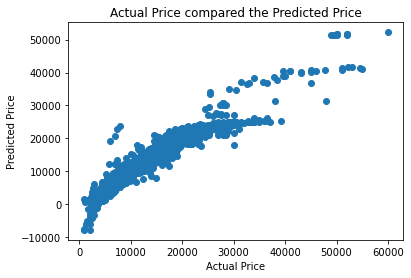

In [30]:
error_score = metrics.r2_score(y_train, lr.predict(X_train))
print("R squared error :" , error_score)

plt.scatter(y_train, lr.predict(X_train))
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price compared the Predicted Price")
plt.show()

R squared error : 0.9272247035135348


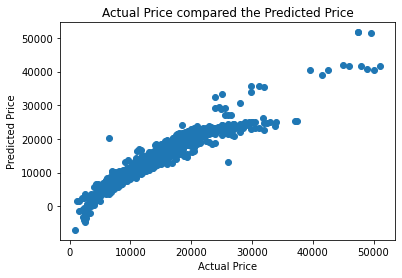

In [31]:
error_score = metrics.r2_score(y_test, lr.predict(X_test))
print("R squared error :" , error_score)

plt.scatter(y_test, lr.predict(X_test))
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price compared the Predicted Price")
plt.show()

In [32]:
#Lasso Regression
'''The lasso regression allows you to shrink or regularize these coefficients to avoid overfitting 
and make them work better on different datasets. This type of regression is used when the dataset 
shows high multicollinearity or when you want to automate variable elimination and feature selection.'''
'''https://dataaspirant.com/lasso-regression/'''

'https://dataaspirant.com/lasso-regression/'

In [33]:
'''train test split again'''
from sklearn.model_selection import train_test_split 
rs=41
X = toyota.drop('price', 1) 
y = toyota.price 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=rs)
from sklearn.metrics import r2_score

'''Lasso Regression'''

lasso = Lasso() 
lasso.fit(X_train, y_train) 
y_pred = lasso.predict(X_test) 
print("R squared score :" ,(r2_score(y_test, y_pred)))

R squared score : 0.9224212149150287


R squared error : 0.9295193614918322


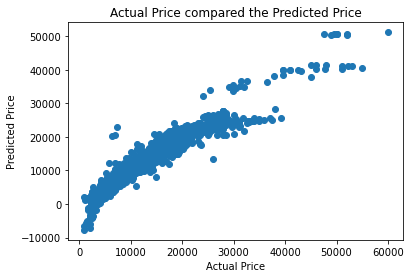

In [34]:
error_score = metrics.r2_score(y_train, lasso.predict(X_train))
print("R squared error :" , error_score)

plt.scatter(y_train, lasso.predict(X_train))
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price compared the Predicted Price")
plt.show()

R squared error : 0.9224212149150287


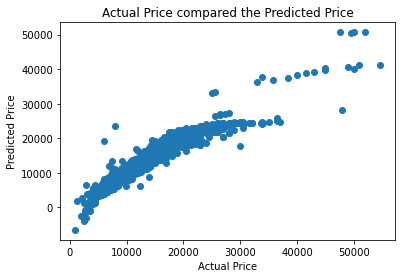

In [35]:
error_score = metrics.r2_score(y_test, lasso.predict(X_test))
print("R squared error :" , error_score)

plt.scatter(y_test, lasso.predict(X_test))
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price compared the Predicted Price")
plt.show()

In [36]:
'''We are testing the model against the given parameters, and printing the 
percent that our model is accurate.'''
array = []
for i in range(0, len(X_test)):
    a = lasso.predict(X_test.iloc[i:i+1])
    b = y_test.iloc[i]+1500
    if a > b:
      array.append(0)
    else:
      array.append(1)
c=sum(array)

d=len(array)

print("We are able to accurately predict the price of the car: ",  round(c/d *100 ,2) ,"% of the time." )

We are able to accurately predict the price of the car:  91.35 % of the time.


In [37]:
#Random Forest Regressor
'''Random Forest Regressor can perform both regression and classification tasks. 
It produces good predictions that can be understood easily. 
It can handle large datasets efficiently. 
The random forest algorithm provides a higher level of accuracy in predicting outcomes over the decision tree algorithm'''
'''https://www.section.io/engineering-education/introduction-to-random-forest-in-machine-learning/'''

'https://www.section.io/engineering-education/introduction-to-random-forest-in-machine-learning/'

In [46]:
'''train test split again'''
from sklearn.model_selection import train_test_split 
rs=1
X = toyota.drop('price', 1) 
y = toyota.price 
X = scale(X)
y = scale(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rs)

rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

score = rfr.score(X_train, y_train)
print("R-squared:", score) 
y_pred = rfr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0))

R-squared: 0.9929098235016022
MSE:  0.04028673343854507
RMSE:  0.020143366719272537


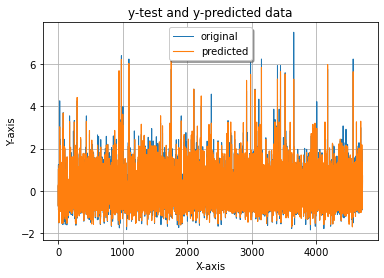

In [47]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, y_pred, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [48]:
'''We are testing the model against the given parameters, and printing the 
percent that our model is accurate.'''
array = []
for i in range(0, len(X_test)):
    a = rfr.predict(X_test[i:i+1])
    b = y_test[i]+1500
    if a > b:
      array.append(0)
    else:
      array.append(1)
c = sum(array)

d=len(array)
print (c)
print(d)
print("We are able to accurately predict the price of the car: ",  c/d *100 ,"% of the time." )

4717
4717
We are able to accurately predict the price of the car:  100.0 % of the time.


In [41]:
'''This shows that we can predict the actual selling price of a used car 99.9% of the time based on this dataset.
There are other factors that may come into play when pricing a used car that are not part of this dataset, and 
in the future adding additional data to this algorithm would help create a more accurate model for uncovering the
values of the used cars to be sold.
Lastly, There is probably overfitting that is taking place with our final regression. By adding additional datasets, we will
be able to help eliminate some of the overfitting.'''



'This shows that we can predict the actual selling price of a used car 99.9% of the time based on this dataset.\nThere are other factors that may come into play when pricing a used car that are not part of this dataset, and \nin the future adding additional data to this algorithm would help create a more accurate model for uncovering the\nvalues of the used cars to be sold.\nLastly, There is probably overfitting that is taking place with our final regression. By adding additional datasets, we will\nbe able to help eliminate some of the overfitting.'